# Examen 1 - Portafolios de inversión - P2021. Tipo 3.

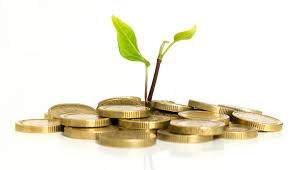

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos primeros módulos.

> El examen consta de dos partes. 
1. La primera es meramente teórica, y los cálculos que puede llegar a involucrar son bastante sencillos. En esta parte, las preguntas son de selección múltiple con justificación, es decir, debes elegir la(s) respuesta(s) correcta(s) y decir porqué la seleccionaste.
2. La segunda parte es práctica, como lo que se ha venido haciendo en las tareas. En esta parte deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de dos compañías en una base diaria, deberás caracterizar los rendimientos y con base en ello construir fronteras media-varianza bajo ciertas condiciones. Finalmente deberás concluir de los resultados.

**Criterio de revisión.**
> Primera parte: tiene un valor del 50% del examen. Habrá una pregunta de alguna demostración hecha en clase o dejada de tarea. También habrán preguntas tipo quiz con justificación. Si la pregunta corresponde a un cálculo numérico, la justificación es en sí las operaciones resueltas para obtener el resultado en el notebook.

> Segunda parte: tiene un valor del 50% del examen. Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen1_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen1_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

In [1]:
# Importamos librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize
import scipy.optimize as opt

## I. Primera parte (50%)

**Pregunta 1.** Suponga que se forma un portafolio con $n$ activos, todos los activos igualmente ponderados, todos los activos con la misma varianza, y todos los pares de activos con la misma covarianza.

Demuestre que cuando la cantidad de activos es suficientemente grande la varianza del portafolio tiende a la covarianza entre pares de activos.

La demostración se puede hacer usando código $\LaTeX$ directamente en las celdas tipo markdown. Alternativamente, se puede hacer en papel e insertar la imagen en el notebook (recuerde que para esto último es necesario subir un archivo comprimido con el notebook y la imagen).

Es importante para la demostración que todo esté perfectamente justificado paso por paso, y no se aceptan pasos "mágicos" sin justificación.

*Demostración* (30%):

**Pregunta 2.** Considere la siguiente distribución de rendimientos de los activos A, B y C:

| Probabilidad     | Rendimiento A       | Rendimiento B         | Rendimiento C         |
| ---------------- | ------------------  | -------------------   | ------------------    |
| 50%              | 0.10                | 0.03                  | 0.08                  |
| 30%              | 0.20                | 0.15                  | -0.13                 |
| 20%              | -0.15               | -0.10                 | 0.02                  |


¿Cuál es la el rendimiento esperado y la volatilidad de un portafolio compuesto 30% por el activo A, 40% por el activo B y 30% por el activo C?

A. $E[r_P]$ = 5.41%, $\sigma_P$ = 6.60%

B. $E[r_P]$ = 4.15%, $\sigma_P$ = 6.60%

C. $E[r_P]$ = 4.51%, $\sigma_P$ = 6.06%

D. $E[r_P]$ = 4.15%, $\sigma_P$ = 6.06%

La respuesta correcta es (5%): **La respuesta correcta es la D.**

In [2]:
# La justificación a esta pregunta son los cálculos necesarios para llegar al resultado (5%)
tabla = pd.DataFrame(columns=["Prob", "A", "B", "C"])
tabla["Prob"] = [0.5, 0.3, 0.2]
tabla["A"] = [0.10, 0.20, -0.15]
tabla["B"] = [0.03, 0.15, - 0.10]
tabla["C"] = [0.08, -0.13, 0.02]
tabla

,Prob,A,B,C
0,0.5,0.10,0.03,0.08
1,0.3,0.20,0.15,-0.13
2,0.2,-0.15,-0.10,0.02


In [3]:
tabla["Portafolio"]= 0.3 * tabla["A"] + 0.4 * tabla["B"] + 0.3 * tabla["C"]
ErP = (tabla["Prob"] * tabla ["Portafolio"]).sum()
sP = (tabla["Prob"] * (tabla["Portafolio"] - ErP)**2).sum()**0.5
ErP, sP

(0.041499999999999995, 0.060599092402444446)

**Pregunta 3.** Suponga que usted está considerando añadir bienes inmuebles a su portafolio bien diversificado que solo consta de activos, bonos y efectivo en una cuenta bancaria. ¿Cuál característica de los rendimientos de los bienes inmuebles afectaría el riesgo de su portafolio?

A. Rendimientos esperados de los bienes inmuebles.

B. Qué tan viejos son los bienes inmuebles.

C. La correlación de los rendimientos de los bienes inmuebles con las otras clases de activos en su portafolio.

D. La desviación estándar de los rendimientos de los bienes inmuebles.

La respuesta correcta es (5%): **La respuesta correcta es la C.**

Justificación (5%):
El agregar bienes inmuebles genera un cambio en la correlación entre los activos del portafolio. Si la correlación baja es mejor, ya que de esta manera se genera una mejor diversificación del portafolio. La falta de relación en cuanto al giro de los activos genera mayor estabilidad, ya que si alguno llega a bajar debido a su giro, no afecta al otro.


___
## II. Segunda parte (50%)

En lo que llevamos del curso hemos hablado que la teoría de portafolios moderna tiene que ver con un concepto base principal: **la diversificación**.

Hemos visto que la diversificación nos ayuda a reducir el riesgo idiosincrático. Sin embargo, también estudiamos que el riesgo puede ser tanto de perder como de ganar, entonces bajo este enfoque no podemos esperar rendimientos exhorbitantes. Por otra parte, sin importar los movimientos del mercado, la diversificación nos ayudará a tener éxito en el largo plazo.

David Swensen, en su libro Unconventional Success, nos provee una estructura de portafolio diversificado con base en diversos sectores. Entre los sectores se incluyen:
- Acciones de EEUU,
- Economías desarrolladas,
- Economías en desarrollo,
- Bienes raíces,
- Entre otros.

Para los anteriores sectores, podemos encontrar ETF's (Exchange Traded Fund) emitidos por la administradora Vanguard:
- Acciones de EEUU: Vanguard S&P 500 ETF (VOO).
- Economías desarrolladas: Vanguard FTSE Developed Markets Index Fund ETF Shares (VEA).
- Economías en desarrollo: Vanguard FTSE Emerging Markets Index Fund ETF Shares (VWO).
- Bienes raíces: Vanguard Real Estate Index Fund ETF Shares (VNQ).

**Punto 1 (10%).** En el archivo `prices_data.csv` se encuentran reportados los **precios mensuales ajustados en el cierre** de los ETF VOO, VEA, VWO, y VNQ, en dólares, desde inicios del 2011 hasta el úlimo mes reportado.

1. Importar los **precios** de los ETF en un **DataFrame indizado por fecha** (5%): 
 - Mostrar la gráfica de estos precios.
 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.
 

In [4]:
precios_aj = pd.read_csv("prices_data.csv", index_col=[0])
precios_aj.head()

,VOO,VEA,VWO,VNQ
Date,,,,
2011-01-01,96.114723,26.870171,35.159519,37.665958
2011-02-01,99.446472,27.852427,35.099018,39.438244
2011-03-01,99.005508,27.146658,37.019962,38.522453
2011-04-01,102.368996,28.836800,38.267845,41.032860
2011-05-01,101.171371,28.058023,37.140965,41.596939


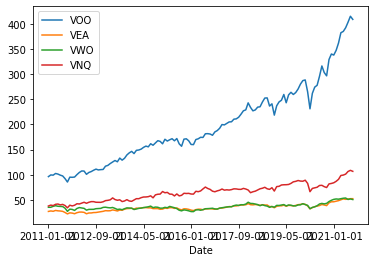

In [5]:
precios_aj.plot();

In [6]:
rend = precios_aj.pct_change().dropna()
rend.head()

,VOO,VEA,VWO,VNQ
Date,,,,
2011-02-01,0.034664,0.036556,-0.001721,0.047053
2011-03-01,-0.004434,-0.025340,0.054729,-0.023221
2011-04-01,0.033973,0.062260,0.033708,0.065167
2011-05-01,-0.011699,-0.027006,-0.029447,0.013747
2011-06-01,-0.021566,-0.012192,-0.009978,-0.041161


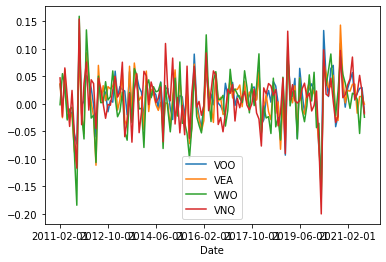

In [7]:
rend.plot();

2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

In [8]:
tabla2 = pd.DataFrame({"Rent": rend.mean(), "Vol": rend.std()})
tabla2

,Rent,Vol
VOO,0.012135,0.039197
VEA,0.006202,0.044605
VWO,0.004222,0.052629
VNQ,0.009313,0.047892


In [9]:
# Covarianza
rend.cov()

,VOO,VEA,VWO,VNQ
VOO,0.001536,0.001511,0.001512,0.001283
VEA,0.001511,0.001990,0.001959,0.001361
VWO,0.001512,0.001959,0.002770,0.001444
VNQ,0.001283,0.001361,0.001444,0.002294


In [10]:
# Corretación
corr = rend.corr()
corr

,VOO,VEA,VWO,VNQ
VOO,1.000000,0.863971,0.732829,0.683677
VEA,0.863971,1.000000,0.834337,0.637255
VWO,0.732829,0.834337,1.000000,0.572965
VNQ,0.683677,0.637255,0.572965,1.000000


**Punto 2 (25%).** Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los ETF. Reportar los **rendimientos esperados y las volatilidades de estos portafolios (base mensual) en un DataFrame** (15%).

2. Encontrar los pesos del portafolio de mínima varianza. Reportar el **rendimiento esperado mensual y la volatilidad mensual del portafolio de mínima varianza** (10%).

**Ayuda.** A veces, la tolerancia por defecto para el optimizador numérico `scipy.optimize.minimize` no se elige correctamente, y es necesario ajustarla manualmente. En este caso, se recomienda pasarle a la función minimize el argumento `tol=1e-10`.

In [11]:
#Activo1: VOO, Activo2: VEA, Activo3: VWO, Activo4: VNQ

# 1. Sigma: matriz de varianza-covarianza
s1 = tabla2["Vol"]["VOO"]
s2 = tabla2["Vol"]["VEA"]
s3 = tabla2["Vol"]["VWO"]
s4 = tabla2["Vol"]["VNQ"]

s12 = corr["VOO"]["VEA"] * s1 * s2
s13 = corr["VOO"]["VWO"] * s1 * s3
s14 = corr["VOO"]["VNQ"] * s1 * s4

s23 = corr["VEA"]["VWO"] * s2 * s3
s24 = corr["VEA"]["VNQ"] * s2 * s4

s34 = corr["VWO"]["VNQ"] * s3 * s4



Sigma = np.array([[s1**2, s12, s13, s14],
                  [s12, s2**2, s23, s24],
                  [s13, s23, s3**2, s34],
                  [s14, s24, s34, s4**2]])



# 2. Eind: rendimientos esperados activos individuales
E1 = tabla2["Rent"]["VOO"]
E2 = tabla2["Rent"]["VEA"]
E3 = tabla2["Rent"]["VWO"]
E4 = tabla2["Rent"]["VNQ"]

Eind = np.array([E1, E2, E3, E4])
# 3. Ereq: rendimientos requeridos para el portafolio
# Número de portafolios
N = 101
Ereq = np.linspace(Eind.min(), Eind.max(), N)

In [12]:
def varianza(w, Sigma):
    return w.T.dot(Sigma).dot(w)
def rendimiento_req(w, Eind, Ereq):
    return Eind.T.dot(w) - Ereq

In [13]:
# Dato inicial
w0 = np.ones(4,) / 4
# Cotas de las variables
bnds = ((0, None), (0, None), (0, None), (0, None))

In [14]:
# DataFrame de portafolios de la frontera
port = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3','w4', 'Rent', 'Vol'])

In [15]:
# Construcción de los N portafolios de la frontera
for i in range(N):
    # Restricciones
    cons = ({'type': 'eq', 'fun': rendimiento_req, 'args': (Eind, Ereq[i])},
            {'type': 'eq', 'fun': lambda w: w.sum() - 1})
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = opt.minimize(fun=varianza,
                           x0=w0,
                           args=(Sigma,),
                           bounds=bnds,
                           constraints=cons)
    # Pesos, rendimientos y volatilidades de los portafolio
    port.loc[i, ['w1','w2','w3','w4']] = min_var.x
    port['Rent'][i] = Eind.dot(min_var.x)
    port['Vol'][i] = np.sqrt(varianza(min_var.x, Sigma))

In [16]:
# Portafolios de la frontera
port

,w1,w2,w3,w4,Rent,Vol
0,0.0,0.0,1.0,0.0,0.004222,0.052629
1,0.0,0.039962,0.960038,0.0,0.004302,0.052023
2,0.0,0.079924,0.920076,0.0,0.004381,0.051435
3,0.0,0.119886,0.880114,0.0,0.00446,0.050867
4,0.0,0.159848,0.840152,0.0,0.004539,0.050319
...,...,...,...,...,...,...
96,0.887833,0.0,0.0,0.112167,0.011819,0.038672
97,0.915875,0.0,0.0,0.084125,0.011898,0.038766
98,0.943916,0.0,0.0,0.056084,0.011977,0.038885
99,0.971958,0.0,0.0,0.028042,0.012056,0.039029


In [17]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)
min_var = opt.minimize(varianza, w0, args=(Sigma,), bounds=bnds, constraints=cons)
min_var

     fun: 0.0016705718105585483
     jac: array([0.00292108, 0.00341002, 0.00384221, 0.00319126])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.25, 0.25, 0.25, 0.25])

In [18]:
w_minvar = min_var.x
E_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, Sigma))

In [19]:
#Rendimiento esperado y volatilidad en portafolios de mínima varianza
E_minvar, s_minvar

(0.007968395863916598, 0.04087262911238459)

- Rendimiento esperado del portafolio de mínima varianza: 0.746%
- Volatilidad del portafolio de mínima varianza: 4.16%

**Punto 3 (15%).** 

1. Usando sus respuestas para el punto anterior, **grafique la frontera de mínima varianza**, además de los puntos correspondientes a los ETF individuales, y del **portafolio de mínima varianza**, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (5%).
2. Concluya acerca de la gráfica de la frontera de mínima varianza, y acerca de los pesos encontrados para el portafolio de mínima varianza (10%).

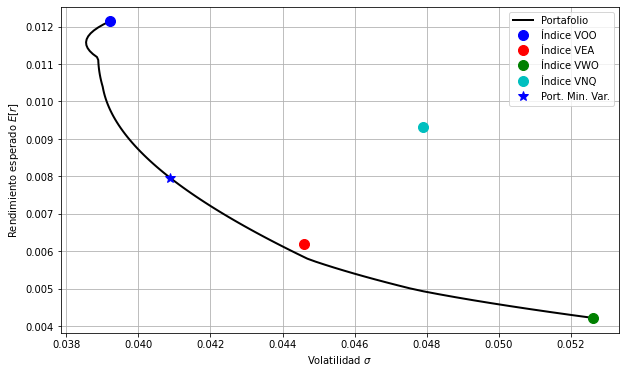

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(port["Vol"], port.Rent, "k-", lw=2, label="Portafolio")

#Índices 
plt.plot(s1, E1, 'ob', ms=10, label="Índice VOO")
plt.plot(s2, E2, 'or', ms=10, label="Índice VEA")
plt.plot(s3, E3, 'og', ms=10, label="Índice VWO")
plt.plot(s4, E4, 'oc', ms=10, label="Índice VNQ")

#Portafolio mínima varianza

plt.plot(s_minvar, E_minvar, '*b', ms=10, label='Port. Min. Var.')

#Etiquetas de los ejes 

plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento esperado $E[r]$')
plt.grid()
plt.legend(loc='best');

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>